## Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## EDA

In [5]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

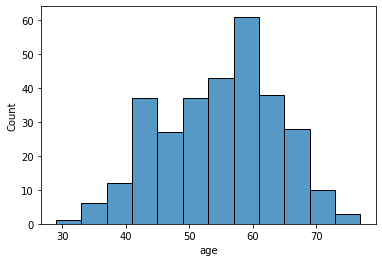

In [6]:
sns.histplot(x="age",data=df);

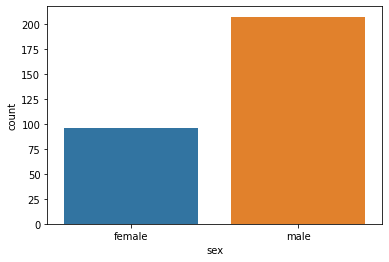

In [7]:
sns.countplot(x="sex",data=df);
plt.xticks(ticks=[0,1],labels=["female","male"])
plt.show()

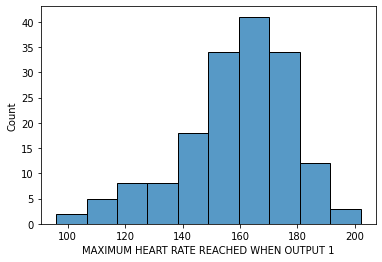

In [8]:
df2=df[df["output"]==1]
sns.histplot(df2["thalachh"],bins=10);
plt.xlabel("MAXIMUM HEART RATE REACHED WHEN OUTPUT 1")
plt.show()

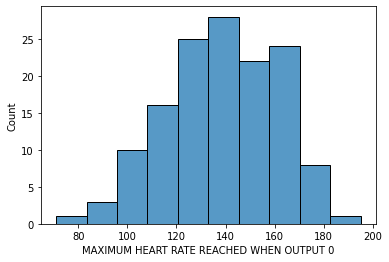

In [9]:
df3=df[df["output"]==0]
sns.histplot(df3["thalachh"],bins=10);
plt.xlabel("MAXIMUM HEART RATE REACHED WHEN OUTPUT 0")
plt.show()

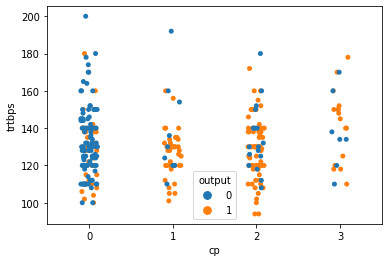

In [10]:
sns.stripplot(x="cp",y="trtbps",hue="output",data=df);

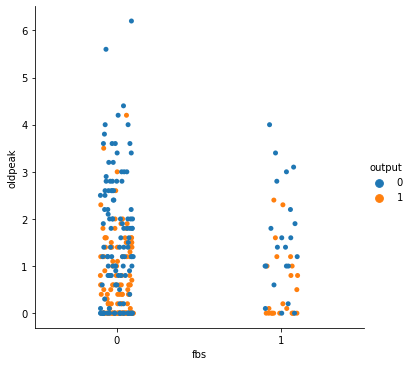

In [11]:
sns.catplot(x="fbs", y="oldpeak", hue="output", kind="strip", data=df);

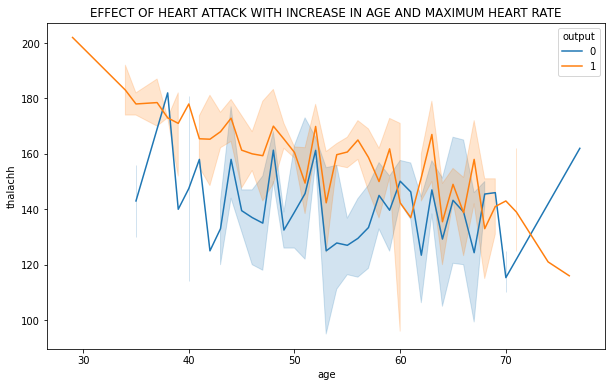

In [12]:
plt.figure(figsize=(10,6))
sns.lineplot(x="age",y="thalachh",hue="output",data=df)
plt.title("EFFECT OF HEART ATTACK WITH INCREASE IN AGE AND MAXIMUM HEART RATE")
plt.show()

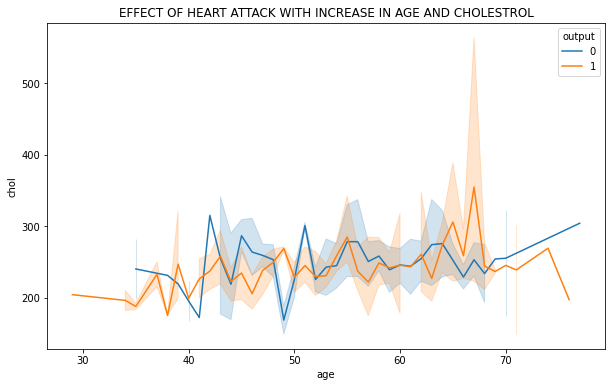

In [13]:
plt.figure(figsize=(10,6))
sns.lineplot(x="age",y="chol",hue="output",data=df)
plt.title("EFFECT OF HEART ATTACK WITH INCREASE IN AGE AND CHOLESTROL")
plt.show()

## Model Building

In [14]:
X=df.drop("output",axis=1).values
y=df["output"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)


#### Decision tree Classifier

In [15]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier(max_depth=3,random_state=1)
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
accuracy_score(y_test,y_pred)

0.7763157894736842

#### RandomForest

In [16]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=400,min_samples_leaf=0.12)
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)
accuracy_score(y_test,y_pred)

0.8552631578947368

#### XGBOOST


In [17]:
from xgboost import XGBClassifier
from sklearn.metrics import r2_score

xgb = XGBClassifier(colsample_bylevel= 0.9,
                    colsample_bytree = 0.8, 
                    gamma=0.99,
                    max_depth= 5,
                    min_child_weight= 1,
                    n_estimators= 8,
                    nthread= 5,
                    random_state= 0,
                    )
xgb.fit(X_train,y_train)

[11:24:23] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.9,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.99, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=8, n_jobs=5, nthread=5, num_parallel_tree=1,
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [18]:
print('Accuracy of XGBoost classifier on training set: {:.2f}'
     .format(xgb.score(X_train, y_train)))
print('Accuracy of XGBoost classifier on test set: {:.2f}'
     .format(xgb.score(X_test, y_test)))

Accuracy of XGBoost classifier on training set: 0.96
Accuracy of XGBoost classifier on test set: 0.84


In [19]:
y_pred=xgb.predict(X_test)
print("Accuracy of XG Boost model is:",
accuracy_score(y_test, y_pred)*100)

Accuracy of XG Boost model is: 84.21052631578947
